<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 167.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 151.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 151.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 132.4 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




Null values: 
 Age           0
JobSat    36311
dtype: int64


 Not null: 
 Age       65437
JobSat    29126
dtype: int64 


Shape of cleaned dataframe: (29126, 115) 


Null values in new dataframe: Age       0
JobSat    0
dtype: int64 




/tmp/ipykernel_299/957914341.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeCode'] = df_clean['Age'].map(age_mapping)


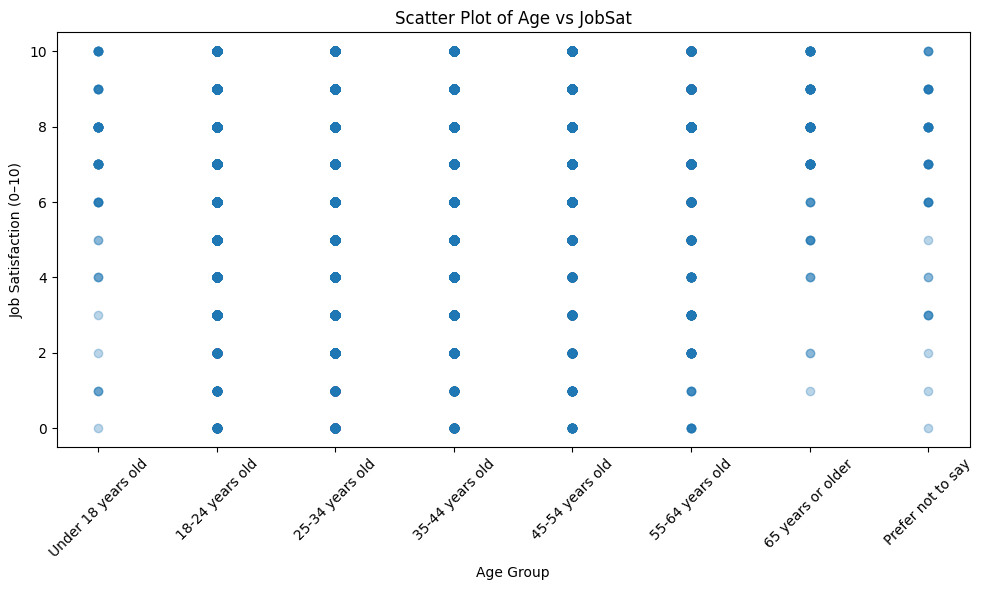

In [41]:
## Write your code here
## JobSat has null values
print("Null values: \n", df[['Age', 'JobSat']].isnull().sum())
print("\n\n", "Not null: \n", df[['Age', 'JobSat']].notnull().sum(), "\n\n")

## Drop NaN rows
df_clean = df.dropna(subset=['JobSat'])
print("Shape of cleaned dataframe:", df_clean.shape, "\n\n")
print("Null values in new dataframe:", df_clean[['Age', 'JobSat']].isnull().sum(), "\n\n")

## Map Age
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

## Map Age to numeric codes
age_mapping = {age: i for i, age in enumerate(age_order)}
df_clean['AgeCode'] = df_clean['Age'].map(age_mapping)

plt.figure(figsize=(10,6))
plt.scatter(df_clean['AgeCode'], df_clean['JobSat'], alpha=0.3)
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Job Satisfaction (0–10)")
plt.title("Scatter Plot of Age vs JobSat")
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


NaN: 
 ConvertedCompYearly    42002
JobSat                 36311
dtype: int64 


Shape of cleaned dataframe: (16075, 115) 


Null values in new dataframe: 
 JobSat                 0
ConvertedCompYearly    0
dtype: int64 


Top 5 largest ConvertedCompYearly after outliers drop: 
 34523    2153432.0
13763    2048046.0
22842    2014062.0
27902    2000000.0
36329    1900000.0
Name: ConvertedCompYearly, dtype: float64 




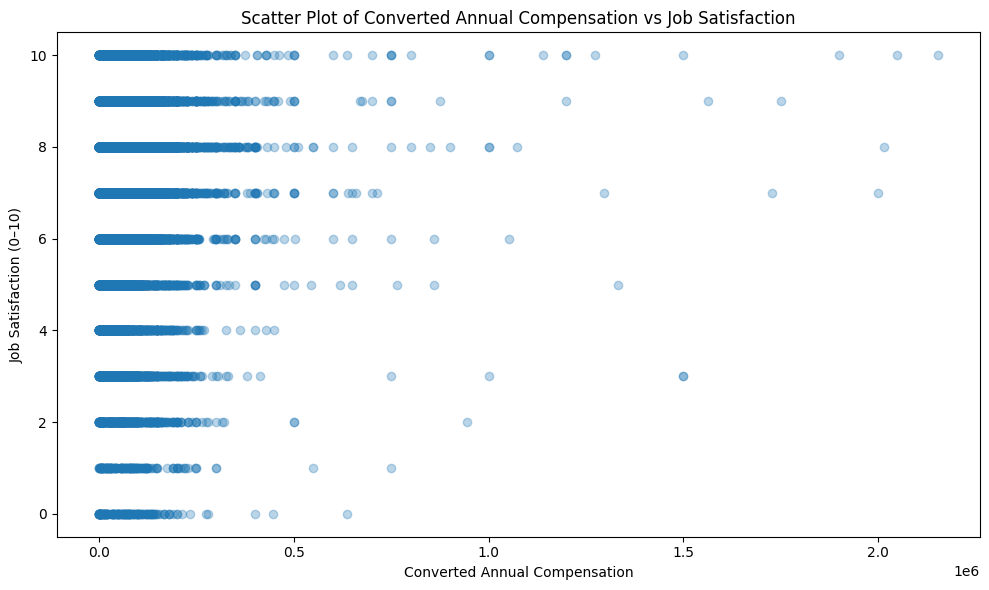

In [33]:
## Write your code here
## There are NaN rows
print("NaN: \n", df[['ConvertedCompYearly', 'JobSat']].isnull().sum(), "\n\n")

## Drop NaN rows
df_clean = df.dropna(subset=['JobSat', 'ConvertedCompYearly'])
print("Shape of cleaned dataframe:", df_clean.shape, "\n\n")
print("Null values in new dataframe:", "\n", df_clean[['JobSat', 'ConvertedCompYearly']].isnull().sum(), "\n\n")

## Drop top 5 ConvertedCompYearly outliers
outliers = (df_clean['ConvertedCompYearly']).nlargest(5).index
df_clean = df_clean.drop(outliers)

## Check for outliers being actually dropped
print("Top 5 largest ConvertedCompYearly after outliers drop: \n", df_clean['ConvertedCompYearly'].nlargest(5), "\n\n")

plt.figure(figsize=(10,6))
plt.scatter(df_clean['ConvertedCompYearly'], df_clean['JobSat'], alpha=0.3)
plt.xlabel("Converted Annual Compensation")
plt.ylabel("Job Satisfaction (0–10)")
plt.title("Scatter Plot of Converted Annual Compensation vs Job Satisfaction")
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


Total null: 
 AgeCode    0
JobSat     0
dtype: int64 




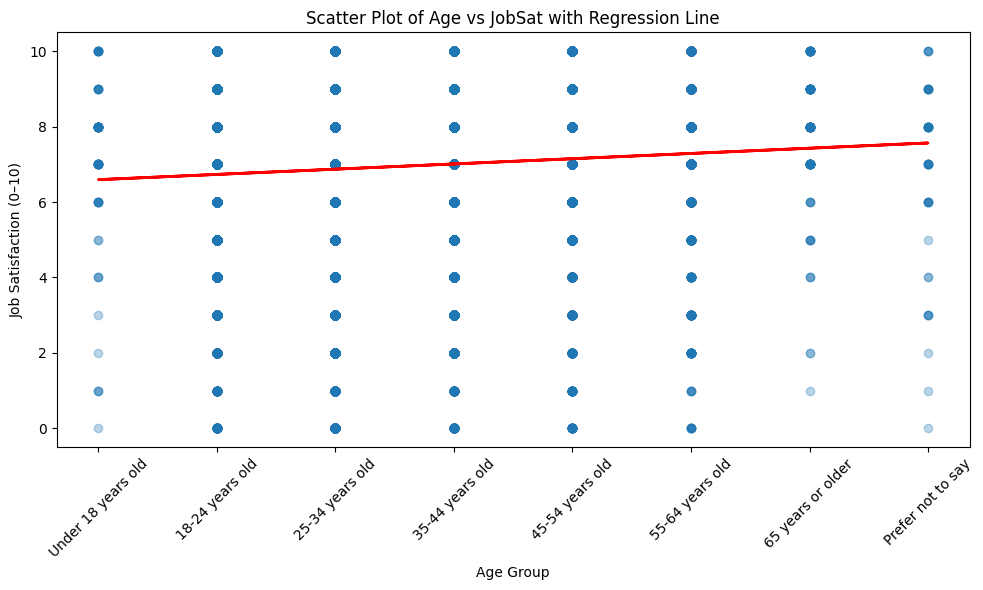

In [46]:
## Write your code here
import numpy as np

## Check for null and value_counts
print("Total null: \n", df_clean[['AgeCode', 'JobSat']].isnull().sum(), "\n\n")

# Fit a regression line
plt.figure(figsize=(10,6))
plt.scatter(df_clean['AgeCode'], df_clean['JobSat'], alpha=0.3)
m, b = np.polyfit(df_clean['AgeCode'], df_clean['JobSat'], 1)
plt.plot(df_clean['AgeCode'], m*df_clean['AgeCode'] + b, color='red', linewidth=2)
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Job Satisfaction (0–10)")
plt.title("Scatter Plot of Age vs JobSat with Regression Line")
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


Null values: 
 AgeCode           0
YearsCodePro    770
dtype: int64 


Total NaN after cleaning: 
 AgeCode         0
YearsCodePro    0
dtype: int64 


YearsCodePro value_counts: 
 YearsCodePro
3                     2261
2                     2153
5                     2016
10                    1918
4                     1866
6                     1725
8                     1588
7                     1533
1                     1173
12                    1111
9                      973
15                     935
20                     819
11                     806
Less than 1 year       780
13                     703
14                     629
16                     577
18                     526
25                     505
17                     481
24                     343
30                     318
19                     312
22                     275
23                     258
26                     243
21                     216
27                     212
28                     1

/tmp/ipykernel_299/577796906.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_2['YearsCodePro'] = df_clean_2['YearsCodePro'].replace(mapping)
/tmp/ipykernel_299/577796906.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_2['YearsCodePro'] = pd.to_numeric(df_clean_2['YearsCodePro'], errors='coerce')
/tmp/ipykernel_299/577796906.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

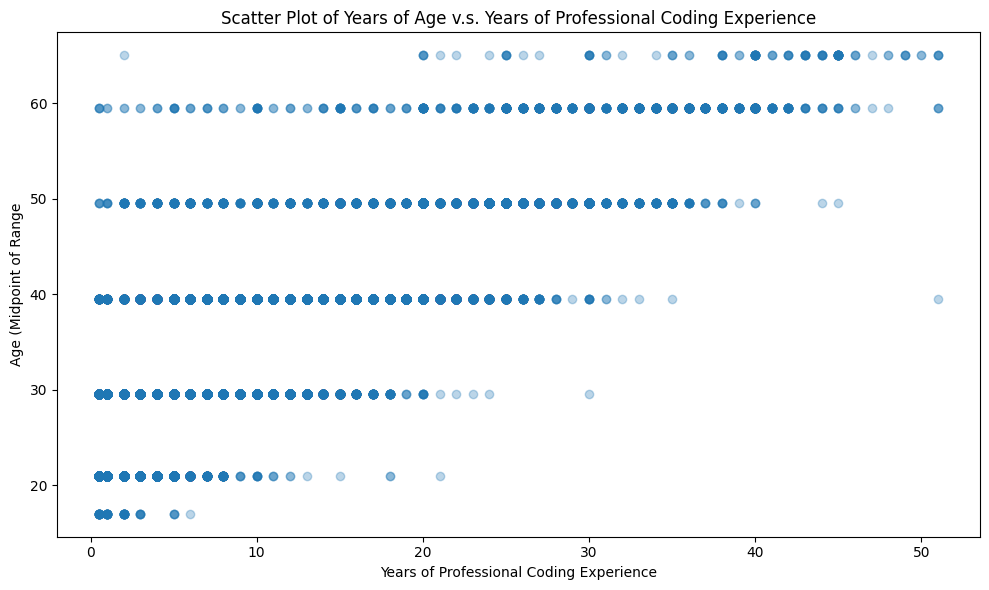

In [63]:
## Write your code here
## Check for NaN values
print("Null values: \n", df_clean[['AgeCode', 'YearsCodePro']].isnull().sum(), "\n\n")

## Remove Nan from YearsCodePro and check
df_clean_2 = df_clean.dropna(subset='YearsCodePro')
print("Total NaN after cleaning: \n", df_clean_2[['AgeCode', 'YearsCodePro']].isnull().sum(), "\n\n")

## Value_Counts() for YearsCodePro, create mapping, apply mapping, and make it numeric values
print("YearsCodePro value_counts: \n", df_clean_2['YearsCodePro'].value_counts(), "\n\n")
mapping = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51
}
df_clean_2['YearsCodePro'] = df_clean_2['YearsCodePro'].replace(mapping)
df_clean_2['YearsCodePro'] = pd.to_numeric(df_clean_2['YearsCodePro'], errors='coerce')
print("Cleaned YearsCodePro value_counts: \n", df_clean_2['YearsCodePro'].value_counts(), "\n\n")

## Create mapping and apply mapping Age midpoints
age_midpoints = {
    0: 17,
    1: 21,
    2: 29.5,
    3: 39.5,
    4: 49.5,
    5: 59.5,
    6: 65,
    7: None
}
df_clean_2['AgeMid'] = df_clean_2['AgeCode'].map(age_midpoints)
print("Cleaned and re-mapped Age groups: \n", df_clean_2['AgeMid'].value_counts(), "\n\n")

plt.figure(figsize=(10,6))
plt.scatter(df_clean_2['YearsCodePro'], df_clean_2['AgeMid'], alpha=0.3)
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Age (Midpoint of Range")
plt.title("Scatter Plot of Years of Age v.s. Years of Professional Coding Experience")
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


Outliers (Top 5): 
 12723    13818022.0
28379     9000000.0
17593     6340564.0
17672     4936778.0
19267     3367716.0
Name: ConvertedCompYearly, dtype: float64 


Top 5 outliers after cleaning: 
 34523    2153432.0
13763    2048046.0
22842    2014062.0
27902    2000000.0
36329    1900000.0
Name: ConvertedCompYearly, dtype: float64 




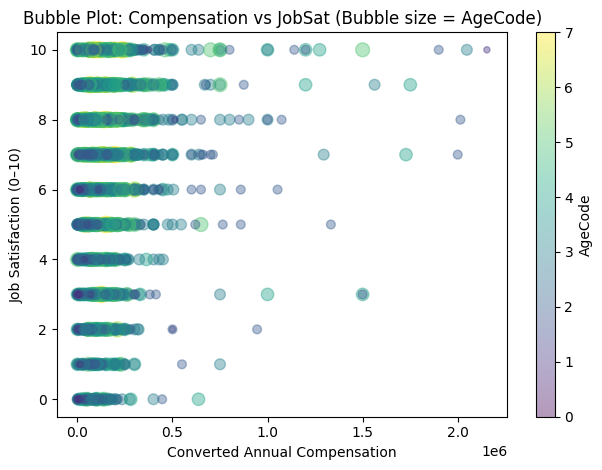

In [67]:
## Write your code here
## Check for outliers in ConvertedCompYearly and remove them
print("Outliers (Top 5): \n", df_clean['ConvertedCompYearly'].nlargest(5), "\n\n")
outliers = df_clean['ConvertedCompYearly'].nlargest(5).index
df_cleaned = df_clean.drop(outliers)
print("Top 5 outliers after cleaning: \n", df_cleaned['ConvertedCompYearly'].nlargest(5), "\n\n")

plt.scatter(
    df_cleaned['ConvertedCompYearly'],
    df_cleaned['JobSat'],
    s=df_cleaned['AgeCode']*20,
    alpha=0.4,
    c=df_cleaned['AgeCode'],
    cmap='viridis'
)
plt.xlabel("Converted Annual Compensation")
plt.ylabel("Job Satisfaction (0–10)")
plt.title("Bubble Plot: Compensation vs JobSat (Bubble size = AgeCode)")
plt.colorbar(label="AgeCode")  
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


Null values in LanguageHaveWorkedWith: 
 0 




/tmp/ipykernel_299/3656959656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanest['LanguageList'] = df_cleanest['LanguageHaveWorkedWith'].str.split(';')


LanguageList check for transformation: 
 10                           [JavaScript, Python, Ruby]
12    [Bash/Shell (all shells), C#, JavaScript, Powe...
15    [C#, HTML/CSS, JavaScript, PowerShell, SQL, Ty...
18         [C#, HTML/CSS, JavaScript, PHP, Python, SQL]
20    [Bash/Shell (all shells), HTML/CSS, PHP, Pytho...
Name: LanguageList, dtype: object 




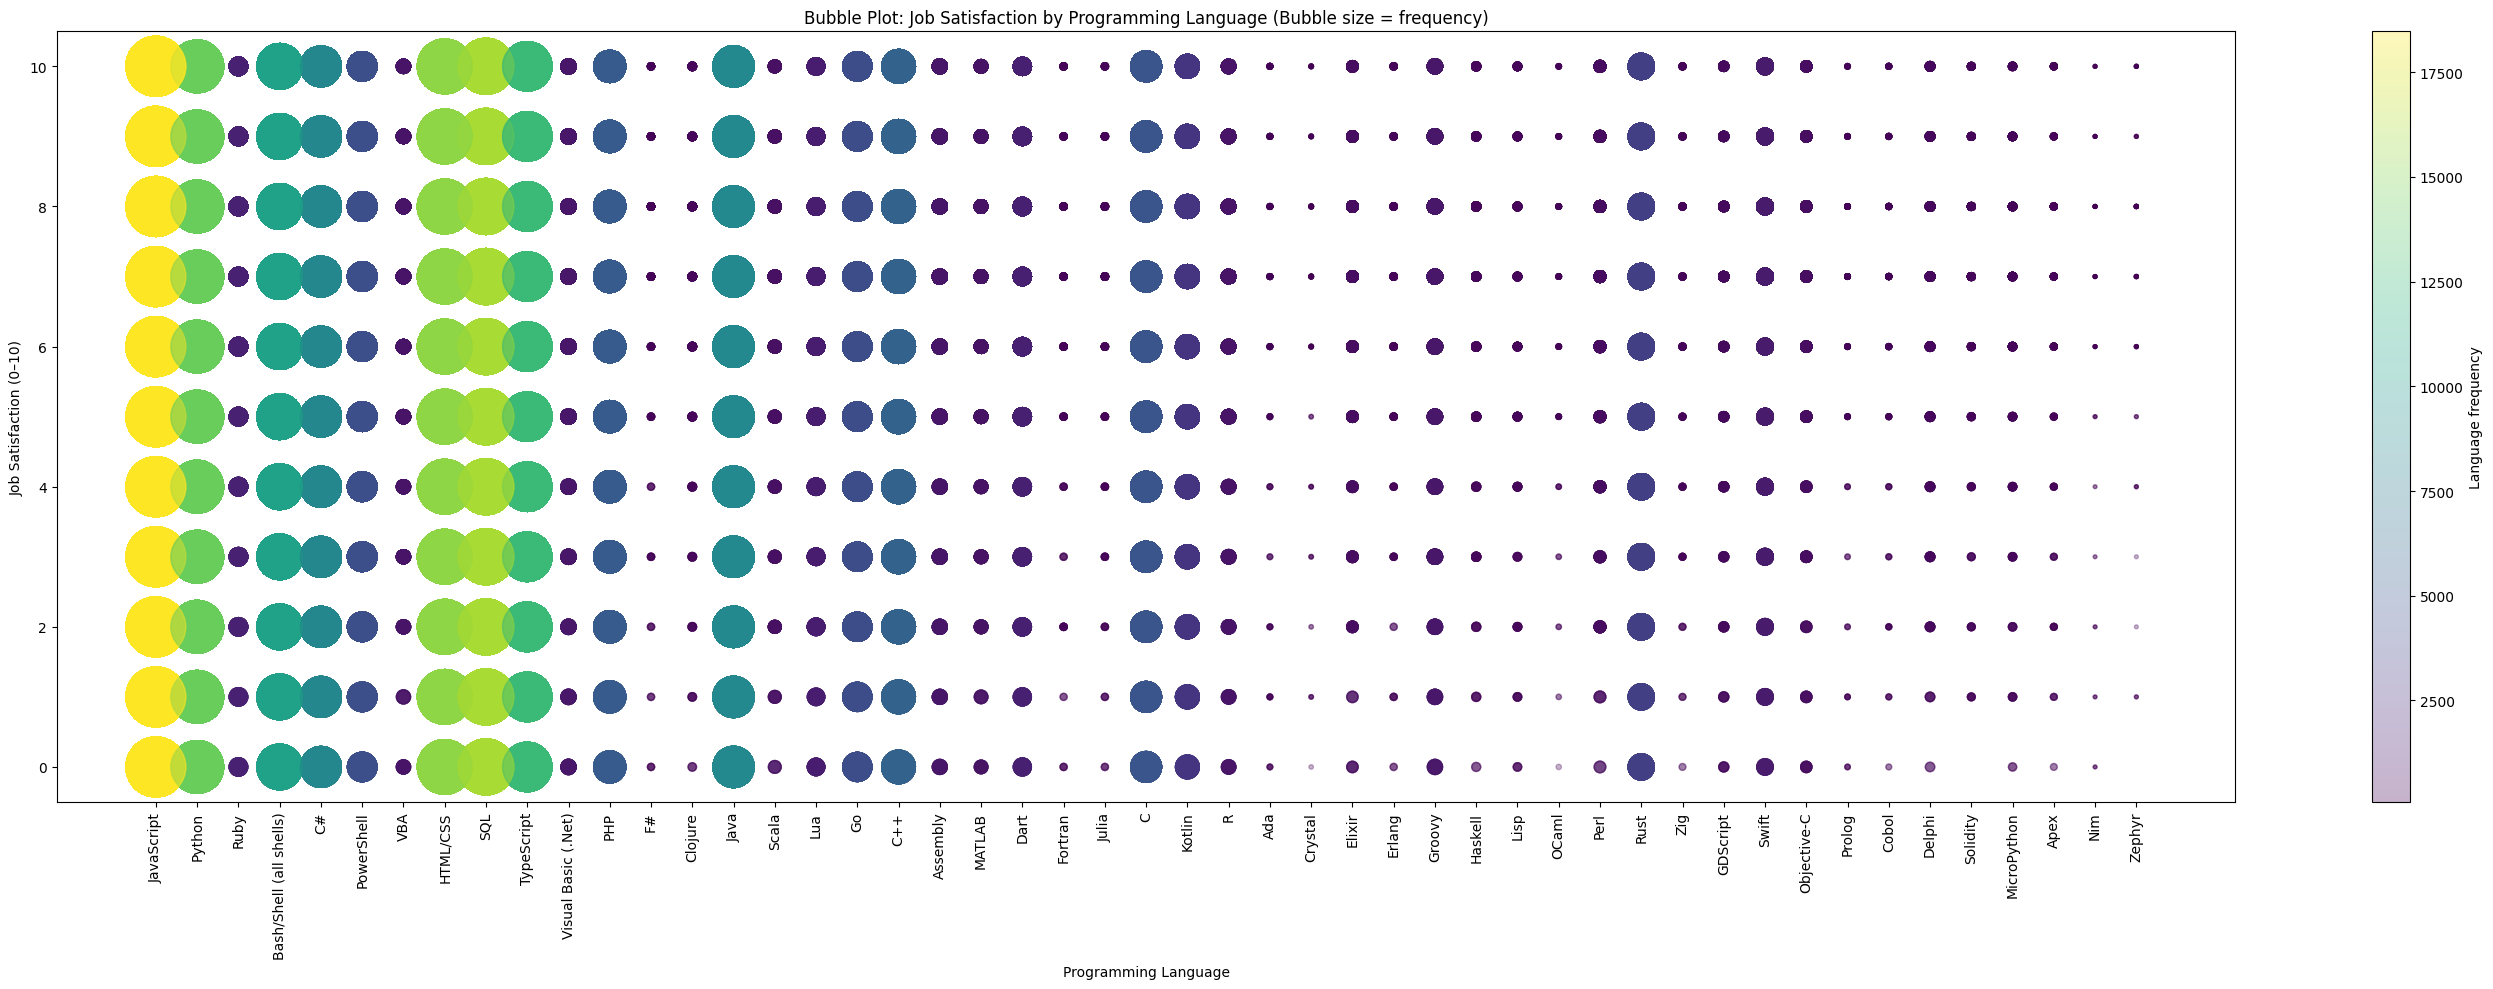

In [80]:
## Write your code here
## Drop NaN values in LanguageHaveWorkedWith
df_cleanest = df_cleaned.dropna(subset=['LanguageHaveWorkedWith'])
print("Null values in LanguageHaveWorkedWith: \n", df_cleanest['LanguageHaveWorkedWith'].isnull().sum(), "\n\n")

## Split semi-colon separated values in LanguageHaveWorkedWith
df_cleanest['LanguageList'] = df_cleanest['LanguageHaveWorkedWith'].str.split(';')

## Explode list so each language has its own row
df_exploded = df_cleanest.explode('LanguageList')

## Check head of LanguageList to see if transformation worked
print("LanguageList check for transformation: \n", df_cleanest['LanguageList'].head(), "\n\n")

## Count frequency of each language
lang_counts =  df_exploded['LanguageList'].value_counts()

## Map counts to bubble sizes to plot later
df_exploded['LangCount'] = df_exploded['LanguageList'].map(lang_counts)

plt.figure(figsize=(28,10))
plt.scatter(
    df_exploded['LanguageList'],
    df_exploded['JobSat'],
    s=df_exploded['LangCount']*0.1,
    alpha=0.3,
    c=df_exploded['LangCount'],
    cmap='viridis'
)
plt.xticks(rotation=90)
plt.xlabel("Programming Language")
plt.ylabel("Job Satisfaction (0–10)")
plt.title("Bubble Plot: Job Satisfaction by Programming Language (Bubble size = frequency)")
plt.colorbar(label="Language frequency")
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


NaN Values in Employment: 
 0 




/tmp/ipykernel_299/243116526.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


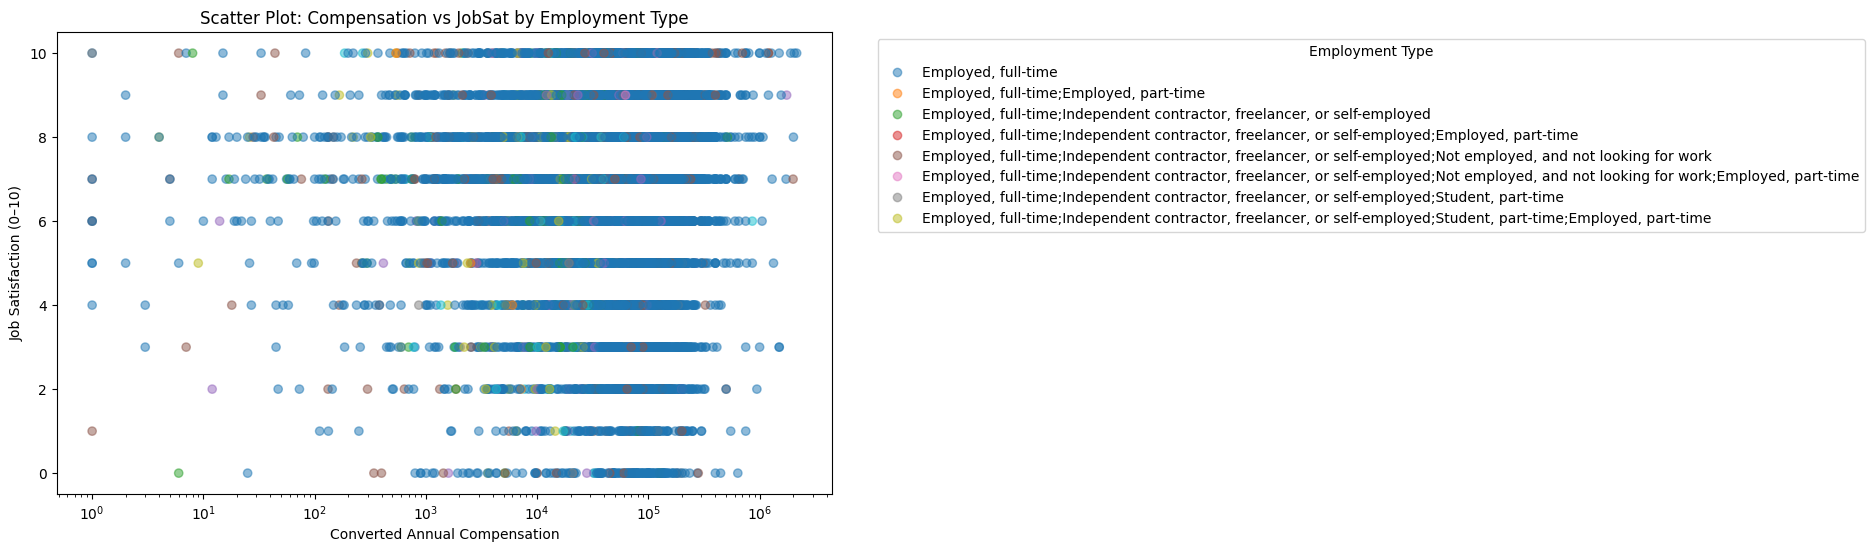

In [88]:
## Write your code here
## Check for NaN values in Employment
print("NaN Values in Employment: \n", df_cleaned['Employment'].isnull().sum(), "\n\n")

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df_cleaned['ConvertedCompYearly'],
    df_cleaned['JobSat'],
    alpha=0.5,
    c=pd.Categorical(df_cleaned['Employment']).codes,
    cmap='tab10'
)

plt.xscale('log')
plt.xlabel("Converted Annual Compensation")
plt.ylabel("Job Satisfaction (0–10)")
plt.title("Scatter Plot: Compensation vs JobSat by Employment Type")
handles, labels = scatter.legend_elements(prop="colors")
employment_labels = df_cleaned['Employment'].astype('category').cat.categories
plt.legend(handles, employment_labels, title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


Null values: 
 0


/tmp/ipykernel_299/1185343222.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


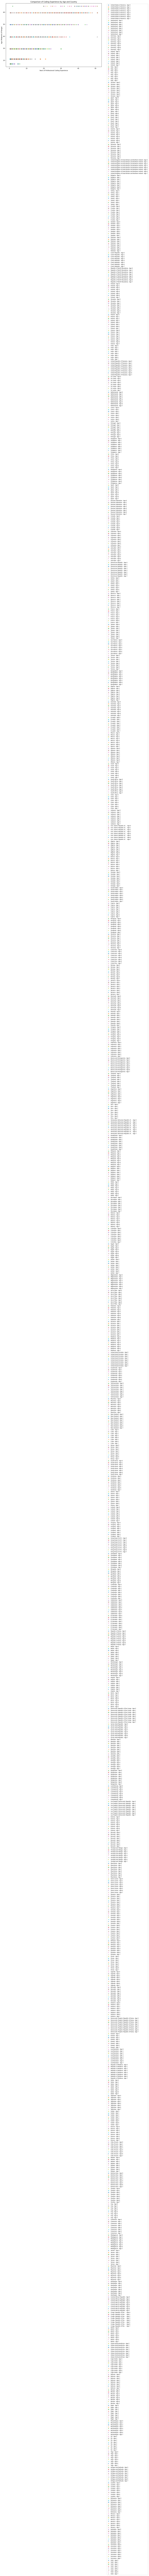

In [91]:
## Write your code here
## Check for NaN values
print("Null values: \n", df_clean_2['Country'].isnull().sum())

# Define marker styles for age groups
age_markers = {
    0: "o",  # Under 18
    1: "s",  # 18–24
    2: "D",  # 25–34
    3: "^",  # 35–44
    4: "v",  # 45–54
    5: "<",  # 55–64
    6: ">",  # 65+
    7: "x"   # Prefer not to say
}

plt.figure(figsize=(12,8))
for country in df_clean_2['Country'].unique():
    country_data = df_clean_2[df_clean_2['Country'] == country]
    for age_code, marker in age_markers.items():
        age_data = country_data[country_data['AgeCode'] == age_code]
        plt.scatter(
            age_data['YearsCodePro'],
            age_data['AgeMid'],
            alpha=0.5,
            label=f"{country} - Age {age_code}",
            marker=marker
        )

plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Age (Midpoint of Range)")
plt.title("Comparison of Coding Experience by Age and Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
